In [ ]:
#initialize
!pip install qiskit
!pip install qiskit qiskit-aer
!pip3 install --upgrade pip
!pip install qiskit==1.3
!pip install qiskit-aer==0.15
!pip install pylatexenc==2.10
!pip install qiskit_ibm_runtime==0.34.0
!pip install pycryptodome
import qiskit
qiskit.__version__

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: qiskit
    Found existing installation: qiskit 2.0.1
    Uninstalling qiskit-2.0.1:
      Successfully uninstalled qiskit-2.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 94.7 MB/s eta 0:00:00
  A

'1.3.0'

# **Part 1: Implement the MDI-QKD Protocol**

In [ ]:

qc4 = QuantumCircuit(2, 2)

# We initialize the input state to |11>
qc4.x(0)
qc4.x(1)
qc4.barrier()

# We apply the Hadamard gate to the first qubit
qc4.h(0)

# We apply the CNOT gate to the first and second qubits
qc4.cx(0, 1)
qc4.barrier()

# We draw the circuit
qc4.draw(output='mpl')
# We execute the quantum circuit on a statevector simulator backend
from qiskit_aer.primitives import SamplerV2
from qiskit.visualization import plot_state_qsphere
sampler = SamplerV2()
job = sampler.run([qc4])
result = job.result()
state = Statevector(qc4)

# We plot the results
plot_state_qsphere(state)

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

def simulate_bell_measurement(alice_bit, alice_basis, bob_bit, bob_basis):
  qc = QuantumCircuit(2,2)

  if alice_bit == 1:
    qc.x(0)
  if alice_basis == 'X':
    qc.h(0)

  if bob_bit == 1:
    qc.x(1)
  if bob_basis == 'X':
    qc.h(1)

  qc.cx(0,1)
  qc.h(0)
  qc.measure([0,1], [0,1])

  sim = AerSimulator()
  transpiled_qc = transpile(qc, sim)
  result = sim.run(transpiled_qc, shots=1).result()
  counts = result.get_counts()

  return list(counts.keys())[0]


def mdi_qkd_simulation_run(n):
  alice_bits = [random.randint(0,1) for _ in range(n)]
  alice_bases = [random.choice("XZ") for _ in range(n)]

  bob_bits = [random.randint(0,1) for _ in range(n)]
  bob_bases = [random.choice("XZ") for _ in range(n)]
  photon_states = [random.choice("HVDA") for _ in range(n)]

  print("Alice's bits: ", alice_bits)
  print("Alice's bases:", alice_bases)
  print("Bob's bits:   ", bob_bits)
  print("Bob's bases:  ", bob_bases)
  print("Polarized Photon State:  ", photon_states)

  print("\nCharlie's Bell State Measurements:",)
  for i in range(n):
    result = simulate_bell_measurement(
        alice_bits[i], alice_bases[i],
        bob_bits[i], bob_bases[i],
    )

    print(f"Pair {i+1}: Most likely Bell state outcome = {result}")

  sifted_key = []
  for i in range(n):
    if alice_bases[i] == bob_bases[i]:
      if alice_bits[i] == bob_bits[i]:
        sifted_key.append(alice_bits[i])

  print("The secret sifted key is:   ", sifted_key)
  return sifted_key

print("\n--- Running Integrated Simulation ---\n")
mdi_qkd_simulation_run(5)

from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from Crypto.Random import get_random_bytes
import hashlib

sifted_key = mdi_qkd_simulation_run(5)
key_bits = ''.join(map(str, sifted_key))

key_bytes = hashlib.sha256(key_bits.encode()).digest()[:16]
plaintext = b"Kumar, Irene, Taskia"
padded_plaintext = pad(plaintext, 16)
cipher = AES.new(key_bytes, AES.MODE_ECB)
ciphertext = cipher.encrypt(padded_plaintext)
print("Plain Text: ", plaintext)
print("Encrypted Ciphertext: ", (ciphertext), 16)

decrypted = unpad(cipher.decrypt(ciphertext), 16)
print("Decrypted: ", decrypted)


--- Running Integrated Simulation ---

Alice's bits:  [1, 0, 0, 1, 1]
Alice's bases: ['Z', 'X', 'X', 'X', 'X']
Bob's bits:    [0, 0, 0, 1, 1]
Bob's bases:   ['X', 'X', 'X', 'Z', 'Z']
Polarized Photon State:   ['V', 'D', 'A', 'H', 'V']

Charlie's Bell State Measurements:
Pair 1: Most likely Bell state outcome = 00
Pair 2: Most likely Bell state outcome = 00
Pair 3: Most likely Bell state outcome = 10
Pair 4: Most likely Bell state outcome = 10
Pair 5: Most likely Bell state outcome = 10
The secret sifted key is:    [0, 0]
Alice's bits:  [0, 0, 0, 0, 0]
Alice's bases: ['X', 'X', 'X', 'X', 'X']
Bob's bits:    [1, 0, 1, 1, 1]
Bob's bases:   ['X', 'X', 'X', 'Z', 'X']
Polarized Photon State:   ['V', 'A', 'A', 'A', 'A']

Charlie's Bell State Measurements:
Pair 1: Most likely Bell state outcome = 11
Pair 2: Most likely Bell state outcome = 10
Pair 3: Most likely Bell state outcome = 01
Pair 4: Most likely Bell state outcome = 10
Pair 5: Most likely Bell state outcome = 01
The secret sifted ke

# **Part 2: the effect of noise**
First on known QDK protocols:
1. BB84
2. E91
3. B92

QBER see the effect of noise based on strength

In [ ]:
#importing all the necessary stuff
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import random
import matplotlib.pyplot as plt
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

BB84 protocol

In [ ]:
# BB84 key generation with qubit state display
def bb84_generate_key(n, show_states=True):
    backend = AerSimulator()
    alice_bits = [random.randint(0, 1) for _ in range(n)]
    alice_bases = [random.choice(['Z', 'X']) for _ in range(n)]
    bob_bases = [random.choice(['Z', 'X']) for _ in range(n)]
    bob_results = []
    shared_key = []

    if show_states:
        print("BB84 Qubit State Preparation by Alice")
        print("-" * 50)
        print("Idx | Bit | Basis | Qubit State")
        print("-" * 50)

    for i, (bit, a_basis, b_basis) in enumerate(zip(alice_bits, alice_bases, bob_bases)):
        qc = QuantumCircuit(1, 1)

        # Prepare Alice's qubit
        if bit == 1:
            qc.x(0)
        if a_basis == 'X':
            qc.h(0)

        # Display state
        if show_states:
            if a_basis == 'Z':
                state = '|0⟩' if bit == 0 else '|1⟩'
            else:
                state = '|+⟩' if bit == 0 else '|−⟩'
            print(f"{i:>3} |  {bit}  |   {a_basis}   |   {state}")

        # Bob's measurement
        if b_basis == 'X':
            qc.h(0)
        qc.measure(0, 0)

        # Run on simulator
        tqc = transpile(qc, backend)
        job = backend.run(tqc, shots=1, memory=True)
        result = job.result()
        bob_bit = int(result.get_memory()[0])
        bob_results.append(bob_bit)

        # Sift key if bases match
        if a_basis == b_basis:
            shared_key.append(bit)

    return shared_key

# Generate key
bb84_key = bb84_generate_key(20, show_states=True)
print("\nFinal BB84 Shared Key (after sifting):", bb84_key)


BB84 Qubit State Preparation by Alice
--------------------------------------------------
Idx | Bit | Basis | Qubit State
--------------------------------------------------
  0 |  0  |   Z   |   |0⟩
  1 |  1  |   X   |   |−⟩
  2 |  1  |   Z   |   |1⟩
  3 |  0  |   X   |   |+⟩
  4 |  0  |   X   |   |+⟩
  5 |  1  |   X   |   |−⟩
  6 |  0  |   X   |   |+⟩
  7 |  1  |   X   |   |−⟩
  8 |  1  |   X   |   |−⟩
  9 |  1  |   Z   |   |1⟩
 10 |  0  |   Z   |   |0⟩
 11 |  0  |   Z   |   |0⟩
 12 |  0  |   Z   |   |0⟩
 13 |  0  |   Z   |   |0⟩
 14 |  0  |   X   |   |+⟩
 15 |  0  |   X   |   |+⟩
 16 |  1  |   Z   |   |1⟩
 17 |  1  |   X   |   |−⟩
 18 |  1  |   X   |   |−⟩
 19 |  0  |   X   |   |+⟩

Final BB84 Shared Key (after sifting): [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]


BB84 with noise model

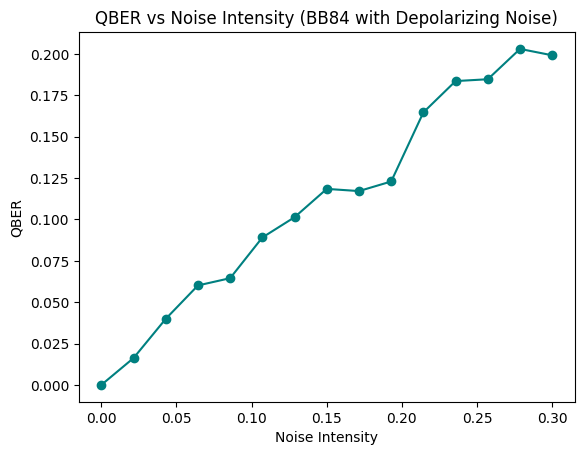

In [ ]:
def simulate_bb84_with_noise(n=1000, noise_intensity=0.05, noise_type="depolarizing"):
    backend = AerSimulator()
    noise_model = NoiseModel()

    # Configure noise
    if noise_type == "depolarizing":
        error = depolarizing_error(noise_intensity, 1)
    elif noise_type == "bit-flip":
        error = pauli_error([('X', noise_intensity), ('I', 1 - noise_intensity)])
    elif noise_type == "phase-flip":
        error = pauli_error([('Z', noise_intensity), ('I', 1 - noise_intensity)])
    else:
        raise ValueError("Unsupported noise type. Choose from 'depolarizing', 'bit-flip', 'phase-flip'.")

    noise_model.add_all_qubit_quantum_error(error, ['h', 'x', 'measure'])

    # Generate Alice and Bob bases
    alice_bits = [random.randint(0, 1) for _ in range(n)]
    alice_bases = [random.choice(['Z', 'X']) for _ in range(n)]
    bob_bases = [random.choice(['Z', 'X']) for _ in range(n)]

    # Prepare batch circuits
    circuits = []
    for bit, a_basis, b_basis in zip(alice_bits, alice_bases, bob_bases):
        qc = QuantumCircuit(1, 1)
        if bit == 1:
            qc.x(0)
        if a_basis == 'X':
            qc.h(0)
        if b_basis == 'X':
            qc.h(0)
        qc.measure(0, 0)
        circuits.append(qc)

    # Transpile as a batch
    tqcs = transpile(circuits, backend)

    # Run all circuits at once
    job = backend.run(tqcs, noise_model=noise_model, shots=1, memory=True)

    # Flatten the results
    results = [int(bit[0]) for i in range(len(circuits)) for bit in job.result().get_memory(i)]

    # Sift the keys
    sifted_bits = [a for a, ab, bb, b in zip(alice_bits, alice_bases, bob_bases, results) if ab == bb]
    sifted_results = [b for a, ab, bb, b in zip(alice_bits, alice_bases, bob_bases, results) if ab == bb]

    #Calculate QBER
    errors = sum([a != b for a, b in zip(sifted_bits, sifted_results)])
    qber = errors / len(sifted_bits) if sifted_bits else 0

    return qber

# Plot QBER vs Noise Intensity
noise_levels = np.linspace(0, 0.3, 15)
qber_values = [simulate_bb84_with_noise(1000, noise, "depolarizing") for noise in noise_levels]

plt.plot(noise_levels, qber_values, marker='o', color='teal')
plt.title("QBER vs Noise Intensity (BB84 with Depolarizing Noise)")
plt.xlabel("Noise Intensity")
plt.ylabel("QBER")
plt.show()


E91 protocol

In [ ]:
def e91_generate_key(n, show_states=True):
    backend = AerSimulator()
    shared_key = []

    # Define measurement angles in degrees for each party (3 bases each)
    alice_angles = [0, 45, 90]
    bob_angles = [22.5, 67.5, -22.5]

    if show_states:
        print("E91 Entangled Pair State and Basis Choices")
        print("-" * 60)
        print("Idx | Alice Basis (°) | Bob Basis (°) | Expected Correlation")
        print("-" * 60)

    for i in range(n):
        # Create entangled Bell pair: (|00⟩ + |11⟩)/√2
        qc = QuantumCircuit(2, 2)
        qc.h(0)
        qc.cx(0, 1)

        # Random basis choices
        alice_angle = random.choice(alice_angles)
        bob_angle = random.choice(bob_angles)

        if show_states:
            correlation = "±1" if abs(alice_angle - bob_angle) in [0, 90] else "~0"
            print(f"{i:>3} |     {alice_angle:>5}°      |   {bob_angle:>5}°    |     {correlation}")

        # Alice and Bob apply basis rotation
        qc.ry(-2 * np.deg2rad(alice_angle), 0)
        qc.ry(-2 * np.deg2rad(bob_angle), 1)

        qc.measure([0, 1], [0, 1])

        # Simulate
        tqc = transpile(qc, backend)
        job = backend.run(tqc, shots=1, memory=True)
        result = job.result()
        measured_bits = result.get_memory()[0]  # e.g., '01'
        a_bit, b_bit = int(measured_bits[1]), int(measured_bits[0])  # note order

        # Key is generated when both use compatible bases (e.g., 0° and 22.5°)
        # For simplicity, we consider 0°/22.5° as compatible
        if (alice_angle, bob_angle) in [(0, 22.5), (45, 67.5), (90, -22.5)]:
            # Shared key = Alice's bit XOR Bob's bit (should be anticorrelated)
            shared_bit = a_bit ^ b_bit
            shared_key.append(shared_bit)

    return shared_key

e91_key = e91_generate_key(20, show_states=True)
print("\nFinal E91 Shared Key (after basis filtering):", e91_key)


E91 Entangled Pair State and Basis Choices
------------------------------------------------------------
Idx | Alice Basis (°) | Bob Basis (°) | Expected Correlation
------------------------------------------------------------
  0 |        45°      |    22.5°    |     ~0
  1 |        90°      |    22.5°    |     ~0
  2 |         0°      |   -22.5°    |     ~0
  3 |         0°      |    67.5°    |     ~0
  4 |         0°      |    22.5°    |     ~0
  5 |        45°      |    67.5°    |     ~0
  6 |         0°      |    22.5°    |     ~0
  7 |        90°      |    22.5°    |     ~0
  8 |        45°      |    22.5°    |     ~0
  9 |         0°      |   -22.5°    |     ~0
 10 |        45°      |    22.5°    |     ~0
 11 |         0°      |   -22.5°    |     ~0
 12 |         0°      |   -22.5°    |     ~0
 13 |         0°      |   -22.5°    |     ~0
 14 |        90°      |    22.5°    |     ~0
 15 |         0°      |    67.5°    |     ~0
 16 |        45°      |   -22.5°    |     ~0
 17 |    

E91 with depolarizing noise

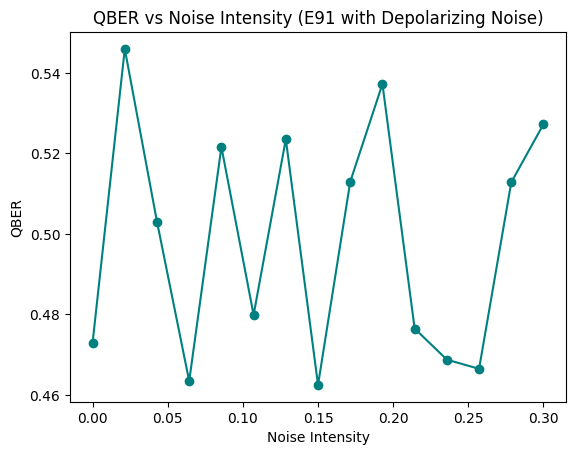

In [ ]:
def simulate_e91_with_noise(n=1000, noise_intensity=0.05, noise_type="depolarizing"):
    backend = AerSimulator()
    noise_model = NoiseModel()

    # Configure noise
    if noise_type == "depolarizing":
        error = depolarizing_error(noise_intensity, 1)
    elif noise_type == "bit-flip":
        error = pauli_error([('X', noise_intensity), ('I', 1 - noise_intensity)])
    elif noise_type == "phase-flip":
        error = pauli_error([('Z', noise_intensity), ('I', 1 - noise_intensity)])
    else:
        raise ValueError("Unsupported noise type. Choose from 'depolarizing', 'bit-flip', 'phase-flip'.")

    # 1-qubit error for single-qubit gates
    single_qubit_error = depolarizing_error(noise_intensity, 1)
    noise_model.add_all_qubit_quantum_error(single_qubit_error, ['u3', 'measure'])

    # 2-qubit error for the cx gate
    two_qubit_error = depolarizing_error(noise_intensity, 2)
    noise_model.add_all_qubit_quantum_error(two_qubit_error, ['cx'])


    # Define measurement angles in degrees for each party (3 bases each)
    alice_angles = [0, 45, 90]
    bob_angles = [22.5, 67.5, -22.5]

    shared_key = []
    circuits = []

    for _ in range(n):
        # Create entangled Bell pair: (|00⟩ + |11⟩)/√2
        qc = QuantumCircuit(2, 2)
        qc.h(0)
        qc.cx(0, 1)

        # Random basis choices
        alice_angle = random.choice(alice_angles)
        bob_angle = random.choice(bob_angles)

        # Apply basis rotations
        qc.ry(-2 * np.deg2rad(alice_angle), 0)
        qc.ry(-2 * np.deg2rad(bob_angle), 1)

        # Measure the qubits
        qc.measure([0, 1], [0, 1])
        circuits.append(qc)

    # Transpile as a batch
    tqcs = transpile(circuits, backend)

    # Run all circuits at once
    job = backend.run(tqcs, noise_model=noise_model, shots=1, memory=True)

    # Extract results
    results = [int(bit[0]) for i in range(len(circuits)) for bit in job.result().get_memory(i)]

    # Generate key (only keep compatible basis measurements)
    for i, (alice_angle, bob_angle) in enumerate(zip(
            [random.choice(alice_angles) for _ in range(n)],
            [random.choice(bob_angles) for _ in range(n)])):

        # Key is generated when both use compatible bases
        if (alice_angle, bob_angle) in [(0, 22.5), (45, 67.5), (90, -22.5)]:
            shared_key.append(results[i])

    # Calculate QBER
    errors = sum([bit != 0 for bit in shared_key])  # Expecting anticorrelation
    qber = errors / len(shared_key) if shared_key else 0

    return qber

# Plot QBER vs Noise Intensity
noise_levels = np.linspace(0, 0.3, 15)
qber_values = [simulate_e91_with_noise(1000, noise, "depolarizing") for noise in noise_levels]

plt.plot(noise_levels, qber_values, marker='o', color='teal')
plt.title("QBER vs Noise Intensity (E91 with Depolarizing Noise)")
plt.xlabel("Noise Intensity")
plt.ylabel("QBER")
plt.show()

B92 protocol

In [ ]:
import random
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

def b92_generate_key(n, show_states=True):
    backend = AerSimulator()
    shared_key = []
    valid_indices = []

    if show_states:
        print("📡 B92 Qubit State Preparation by Alice")
        print("-" * 50)
        print("Idx | Bit | Qubit State Sent")
        print("-" * 50)

    for i in range(n):
        bit = random.randint(0, 1)
        bob_basis = random.choice(['Z', 'X'])

        qc = QuantumCircuit(1, 1)

        # Only one qubit state per bit (not 2 like BB84)
        if bit == 0:
            qc.h(0)  # |+⟩ state
            state = '|+⟩'
        else:
            qc.x(0)
            qc.h(0)  # |−⟩ state
            state = '|−⟩'

        if show_states:
            print(f"{i:>3} |  {bit}  |   {state}")

        # Bob's basis rotation
        if bob_basis == 'X':
            qc.h(0)

        qc.measure(0, 0)
        tqc = transpile(qc, backend)
        job = backend.run(tqc, shots=1, memory=True)
        result = job.result()
        bit_result = int(result.get_memory()[0])

        # B92 post-selection: only when Bob gets 0 (detects the qubit)
        if bit_result == 0:
            shared_key.append(bit)
            valid_indices.append(i)

    return shared_key

b92_key = b92_generate_key(20, show_states=True)
print("\nFinal B92 Shared Key (after sifting):", b92_key)


📡 B92 Qubit State Preparation by Alice
--------------------------------------------------
Idx | Bit | Qubit State Sent
--------------------------------------------------
  0 |  1  |   |−⟩
  1 |  0  |   |+⟩
  2 |  1  |   |−⟩
  3 |  0  |   |+⟩
  4 |  0  |   |+⟩
  5 |  1  |   |−⟩
  6 |  0  |   |+⟩
  7 |  0  |   |+⟩
  8 |  1  |   |−⟩
  9 |  0  |   |+⟩
 10 |  1  |   |−⟩
 11 |  1  |   |−⟩
 12 |  0  |   |+⟩
 13 |  0  |   |+⟩
 14 |  0  |   |+⟩
 15 |  1  |   |−⟩
 16 |  0  |   |+⟩
 17 |  0  |   |+⟩
 18 |  1  |   |−⟩
 19 |  0  |   |+⟩

Final B92 Shared Key (after sifting): [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


B92 with depolarizing noise

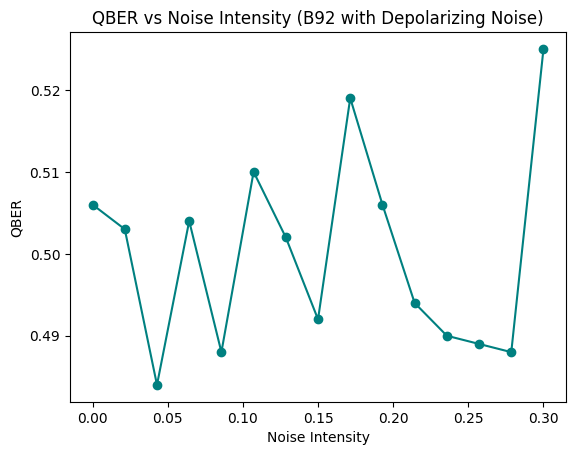

In [ ]:
def simulate_b92_with_noise(n=1000, noise_intensity=0.05, noise_type="depolarizing", show_states=False):
    backend = AerSimulator()
    noise_model = NoiseModel()

    # Configure noise
    if noise_type == "depolarizing":
        error = depolarizing_error(noise_intensity, 1)
    elif noise_type == "bit-flip":
        error = pauli_error([('X', noise_intensity), ('I', 1 - noise_intensity)])
    elif noise_type == "phase-flip":
        error = pauli_error([('Z', noise_intensity), ('I', 1 - noise_intensity)])
    else:
        raise ValueError("Unsupported noise type. Choose from 'depolarizing', 'bit-flip', 'phase-flip'.")

    noise_model.add_all_qubit_quantum_error(error, ['u3', 'measure'])

    # Prepare batch circuits
    circuits = []
    for i in range(n):
        bit = random.randint(0, 1)
        bob_basis = random.choice(['Z', 'X'])

        qc = QuantumCircuit(1, 1)

        # Only one qubit state per bit (not 2 like BB84)
        if bit == 0:
            qc.h(0)  # |+⟩ state
        else:
            qc.x(0)
            qc.h(0)  # |−⟩ state

        # Bob's basis rotation
        if bob_basis == 'X':
            qc.h(0)

        qc.measure(0, 0)
        circuits.append(qc)

    # Batch transpile for speed
    tqcs = transpile(circuits, backend)

    # Run all circuits at once
    job = backend.run(tqcs, noise_model=noise_model, shots=1, memory=True)

    # Flatten the results
    results = [int(bit[0]) for i in range(len(circuits)) for bit in job.result().get_memory(i)]

    # B92 post-selection: only when Bob gets 0 (detects the qubit)
    shared_bits = [bit for bit, result in zip([random.randint(0, 1) for _ in range(n)], results) if result == 0]

    # Calculate QBER
    qber = (n - len(shared_bits)) / n if n > 0 else 0

    return qber

# Plot QBER vs Noise Intensity
noise_levels = np.linspace(0, 0.3, 15)
qber_values = [simulate_b92_with_noise(1000, noise, "depolarizing") for noise in noise_levels]

plt.plot(noise_levels, qber_values, marker='o', color='teal')
plt.title("QBER vs Noise Intensity (B92 with Depolarizing Noise)")
plt.xlabel("Noise Intensity")
plt.ylabel("QBER")
plt.show()


The effect of noise on the MDI protocol


In [ ]:
import random
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

def simulate_bell_measurement(alice_bit, alice_basis, bob_bit, bob_basis):
    qc = QuantumCircuit(2, 2)

    # Alice's bit preparation
    if alice_bit == 1:
        qc.x(0)
    if alice_basis == 'X':
        qc.h(0)

    # Bob's bit preparation
    if bob_bit == 1:
        qc.x(1)
    if bob_basis == 'X':
        qc.h(1)

    # Bell state creation
    qc.cx(0, 1)
    qc.h(0)
    qc.measure([0, 1], [0, 1])

    # Simulating the quantum circuit
    sim = AerSimulator()
    transpiled_qc = transpile(qc, sim)
    result = sim.run(transpiled_qc, shots=1).result()
    counts = result.get_counts()

    return list(counts.keys())[0]  # Return Bell state result (like '00' or '11')

def mdi_qkd_simulation_run(n):
    alice_bits = [random.randint(0, 1) for _ in range(n)]
    alice_bases = [random.choice("XZ") for _ in range(n)]
    bob_bits = [random.randint(0, 1) for _ in range(n)]
    bob_bases = [random.choice("XZ") for _ in range(n)]

    print("Alice's bits: ", alice_bits)
    print("Alice's bases:", alice_bases)
    print("Bob's bits:   ", bob_bits)
    print("Bob's bases:  ", bob_bases)

    sifted_key = []

    for i in range(n):
        result = simulate_bell_measurement(
            alice_bits[i], alice_bases[i],
            bob_bits[i], bob_bases[i],
        )
        print(f"Pair {i+1}: Bell state outcome = {result}")

        if alice_bases[i] == bob_bases[i]:
            if alice_bits[i] == bob_bits[i]:
                sifted_key.append(alice_bits[i])

    print("The secret sifted key is:   ", sifted_key)
    return sifted_key, alice_bits, bob_bits, alice_bases, bob_bases

def calculate_qber(sifted_key, alice_bits, bob_bits, alice_bases, bob_bases):
    errors = 0
    count = 0
    for i in range(len(alice_bits)):
        if alice_bases[i] == bob_bases[i]:
            count += 1
            if alice_bits[i] != bob_bits[i]:
                errors += 1

    qber = errors / count if count > 0 else 0
    return qber

# Define a function to run the QBER simulation at different depolarizing noise levels
def run_qber_vs_noise_plot(noise_levels, n):
    qber_values = []

    for noise in noise_levels:
        qber = mdi_qkd_simulation_run(n, noise)
        qber_values.append(qber)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(noise_levels, qber_values, marker='o', linestyle='-', color='blue')
    plt.title('QBER vs Depolarizing Noise in MDI-QKD Protocol')
    plt.xlabel('Depolarizing Noise Probability')
    plt.ylabel('Quantum Bit Error Rate (QBER)')
    plt.grid(True)
    plt.show()

# Run the simulation
sifted_key, alice_bits, bob_bits, alice_bases, bob_bases = mdi_qkd_simulation_run(10)

# Calculate and print QBER
qber = calculate_qber(sifted_key, alice_bits, bob_bits, alice_bases, bob_bases)
print(f"QBER: {qber}")

# Define a function to run the QBER simulation at different depolarizing noise levels
def run_qber_vs_noise_plot(noise_levels, n):
    qber_values = []

    for noise in noise_levels:
        qber = mdi_qkd_simulation_run(n, noise)
        qber_values.append(qber)

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(noise_levels, qber_values, marker='o', linestyle='-', color='blue')
    plt.title('QBER vs Depolarizing Noise in MDI-QKD Protocol')
    plt.xlabel('Depolarizing Noise Probability')
    plt.ylabel('Quantum Bit Error Rate (QBER)')
    plt.grid(True)
    plt.show()

Alice's bits:  [1, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Alice's bases: ['Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'Z']
Bob's bits:    [1, 0, 0, 1, 0, 0, 0, 1, 1, 1]
Bob's bases:   ['X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z']
Pair 1: Bell state outcome = 01
Pair 2: Bell state outcome = 11
Pair 3: Bell state outcome = 10
Pair 4: Bell state outcome = 00
Pair 5: Bell state outcome = 00
Pair 6: Bell state outcome = 01
Pair 7: Bell state outcome = 01
Pair 8: Bell state outcome = 01
Pair 9: Bell state outcome = 01
Pair 10: Bell state outcome = 11
The secret sifted key is:    [1, 0, 1, 1]
QBER: 0.3333333333333333


Single MDI-QKD simulation without noise:
QBER: 0.800
Sifted key: [1]

Running noise simulation...
Noise: 0.000 - QBER: 0.412 - Key Rate: 0.282
Noise: 0.021 - QBER: 0.474 - Key Rate: 0.298
Noise: 0.043 - QBER: 0.421 - Key Rate: 0.298
Noise: 0.064 - QBER: 0.442 - Key Rate: 0.284
Noise: 0.086 - QBER: 0.427 - Key Rate: 0.280
Noise: 0.107 - QBER: 0.483 - Key Rate: 0.258
Noise: 0.129 - QBER: 0.556 - Key Rate: 0.230
Noise: 0.150 - QBER: 0.511 - Key Rate: 0.242
Noise: 0.171 - QBER: 0.466 - Key Rate: 0.244
Noise: 0.193 - QBER: 0.507 - Key Rate: 0.248
Noise: 0.214 - QBER: 0.446 - Key Rate: 0.264
Noise: 0.236 - QBER: 0.474 - Key Rate: 0.270
Noise: 0.257 - QBER: 0.523 - Key Rate: 0.232
Noise: 0.279 - QBER: 0.515 - Key Rate: 0.238
Noise: 0.300 - QBER: 0.463 - Key Rate: 0.264


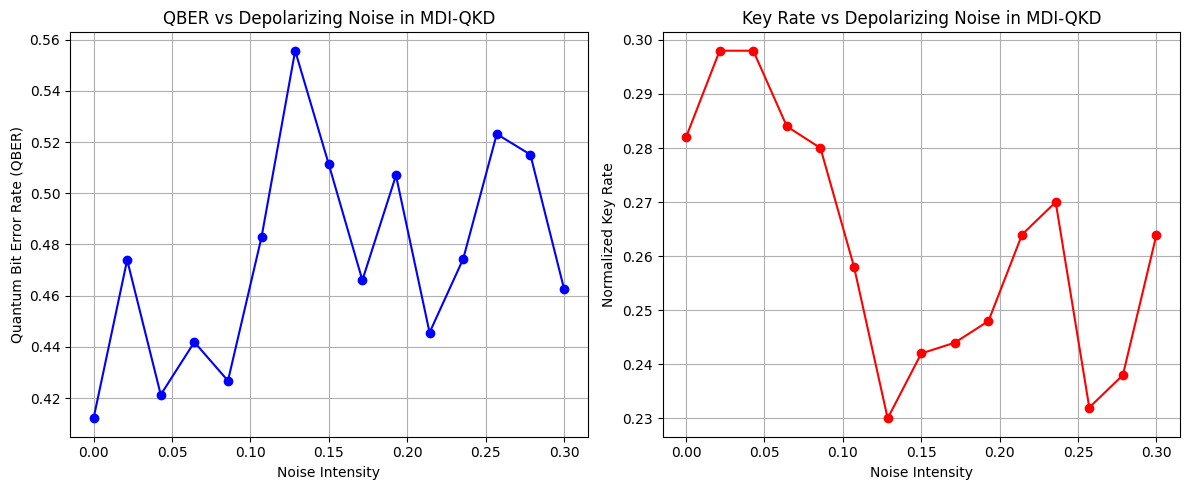

Sources:


[BB84 implementation gitHub](https://github.com/qmunitytech/Tutorials/blob/main/intermediate/The%20BB84%20Quantum%20Cryptography%20algorithm.ipynb)

[Quantum criptography gitHub](https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb)

[Building noise models IBM documentation](https://docs.quantum.ibm.com/guides/build-noise-models)